## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [2]:
model_dir = '/home/drevital/cs_video_processor/models/new_factory_gg_2_const'
#model_dir = '/home/drevital/cs_video_processor/models/gg_2_const'
im_dir = '/home/drevital/obstacles_classification_datasets/test_2/no_obs_pairs'
im_name = '1_66_1.00_2021-09-03--06-48-17_.jpg'
im_height = 200
im_width = 200

## Load Trained Model

In [3]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [4]:
im_rgb = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY)  

## Display Images

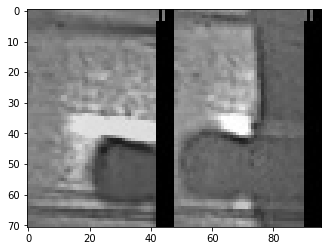

In [5]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show() 

## Prepare Images for Prediction

In [6]:
w = im.shape[1]
im1 = im[:,:w//2]
im2 = im[:,w//2:]
const = np.full((im1.shape[0]*im1.shape[1]), 127, dtype=np.uint8)
const = const.reshape((im1.shape[0], im1.shape[1], 1))
gg2const = cv2.merge([im1, im2, const])
gg2const = cv2.resize(gg2const,
                dsize=(im_width, im_height),
                interpolation=cv2.INTER_LINEAR)

# Convert image from uint8 to float32
gg2const = np.array(gg2const, dtype='float32')

# Translate original rabge (0-255) to trained range (0.0-1.0)
gg2const /= 255.0

# Reshape to match model's input shape
gg2const = gg2const.reshape(1, gg2const.shape[0], gg2const.shape[1], 3)

## Predict 

In [7]:
prediction = model.predict(gg2const)

## Show Prediction

In [8]:
prediction

array([[0.9969206]], dtype=float32)

In [9]:
gg2const *= 255.0

In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [12]:
datagen = ImageDataGenerator(rescale=1./255)

In [14]:
gg2const = gg2const.reshape(1, gg2const.shape[1], gg2const.shape[2], 3)

In [15]:
val_generator = datagen.flow(gg2const)

In [16]:
predictions = model.predict_generator(val_generator)

/home/drevital/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [17]:
predictions

array([[0.9969205]], dtype=float32)